# Simple Image Classifier

## Neuronale Netze auf https://bootcamp.codecentric.ai

Wir starten mit einer kleinen Praxis Übung. Das folgende Notebook trainiert einen Image Classifier mit der fast.ai Library. Wir verwenden in diesem Beispiel ein sehr kleines und einfaches Dataset (damit man auch auf einer CPU nicht lange trainieren muss). 

**Das Learning dabei ist:** die gleiche Pipeline kann man verwenden, um komplexe eigene Classifier auf deutlich größeren Daten zu trainieren. Man muss nur andere Bilder in andere Ordner legen.


Imports und Settings

In [1]:
from fastai.basics import *
from fastai.vision import *

### Ordner festlegen, wo Daten liegen 

Die Struktur ist wichtig und sieht so aus:

data/fruits-360/Training/
- /Kiwi/bild1.jpg
- /Kiwi/bild2.png
- /Banane/bild3.jpg
- /Banane/bild4.jpg
- ...

Die Bilder werden anhand der Ordner "gelabelt".

In [2]:
DATA = "/data/fruits-360/"
TRAIN = DATA + "Training/"

Der folgende Befehl macht:

* Daten aus Ordner laden (bzw. einen Loader definieren)
* Labels aus Ordner Namen zuordnen (alle Bilder im Ordner Kiwi sind Kiwis)
* Split Train/Valid (20 %)
* Bilder verkleinern (size 28)
* (und einiges mehr)

In [3]:
data = ImageDataBunch.from_folder(DATA, train=TRAIN, 
                                  valid_pct=0.2, size=28)

Wie sehen unsere Daten aus? Einfach mal ein paar Beispiele der Trainigsdaten anzeigen:

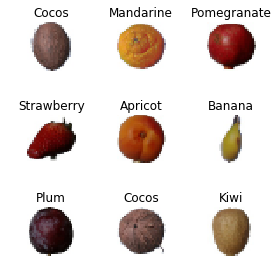

In [4]:
data.show_batch(rows=3, figsize=(4,4))

Der folgende Befehl macht:

* Erzeuge ein CNN
* mit einer Standard Architektur (vortrainiertes ResNet)
* Architektur wird automatisch auf neue Daten angepasst (Bildgrößen, Klassen, etc.)
* gebe im Trainingsloop die Metrik "Accuracy" aus
* unter der Haube werden viele Standard-Werte gesetzt (welcher Optimizer, Hyperparameter, Best Practices, ...)

In [5]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

### Start Training

In [6]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.125087,0.004872,0.999507,00:46


### Jetzt mit dem trainierten Modell eine Vorhersage machen

Wir nehmen dazu ein random Bild aus dem Test Ordner (diese Bilder wurden beim Training nicht verwendet).

In [7]:
TEST = DATA + "Test/"
TEST_IMAGES = !find $TEST | grep jpg

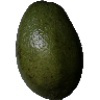

In [8]:
test_img = open_image(random.choice(TEST_IMAGES))
test_img

und machen eine prediction mit dem Modell:

In [9]:
learn.predict(test_img)

(Category Avocado,
 tensor(1),
 tensor([1.0067e-05, 9.9950e-01, 2.3665e-06, 3.0615e-06, 3.5876e-04, 8.7792e-07,
         9.6887e-08, 1.5341e-05, 2.0736e-06, 1.0971e-05, 8.7716e-06, 3.8218e-06,
         1.3066e-06, 7.9384e-05, 1.8743e-06, 1.4443e-06]))

## Credits

Für dieses Beispiel verwenden wir eine abgespeckte Version des fruits-360 Dataset:

Horea Muresan, Mihai Oltean, Fruit recognition from images using deep learning, Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.
https://github.com/Horea94/Fruit-Images-Dataset

Für die Übung verwenden wir die fast.ai Library - siehe http://fast.ai